# Naive Bayes (NB) for Spam Filtering

This tutorial introduces the Naive Bayes (NB) algorithm and demonstrates its application in spam filtering. Naive Bayes is a probabilistic classification algorithm widely used for tasks like text classification. In the context of spam filtering, Naive Bayes calculates the probability that an email is spam or not spam based on the words it contains.

### Naive Bayes (NB) Overview:

1. **Basic Idea**:

   - Naive Bayes is a **probabilistic** algorithm based on Bayes' theorem with the "naive" assumption of feature independence.
   - It predicts the class of a given data point by calculating the conditional probabilities of each class given the input features and selecting the class with the highest probability.

2. **How it Works**:

   - **Step 1**: Calculate the prior probability of each class (P(C)).
   - **Step 2**: For each feature, calculate the likelihood of that feature given each class (P(F|C)).
   - **Step 3**: Use Bayes' theorem to calculate the posterior probability of each class given the features (P(C|F)).
   - **Step 4**: Select the class with the highest posterior probability as the predicted class.

3. **Parameters**:

   - Naive Bayes doesn't have many hyperparameters. The type of Naive Bayes (e.g., Gaussian, Multinomial, Bernoulli) and any optional smoothing parameters (e.g., Laplace smoothing) are the main considerations.

4. **Types of Naive Bayes**:

   - **Gaussian Naive Bayes**: Assumes that continuous features follow a Gaussian distribution.
   - **Multinomial Naive Bayes**: Suitable for discrete features (e.g., word counts).
   - **Bernoulli Naive Bayes**: Appropriate for binary features (e.g., presence or absence of a term).

5. **Advantages**:

   - Fast and efficient training and prediction.
   - Can handle a large number of features.
   - Works well with categorical and discrete data.

6. **Disadvantages**:

   - Relies on the "naive" assumption of feature independence, which may not always hold in real-world data.
   - Sensitive to the quality of the training data.
   - Can struggle with rare or unseen feature combinations.

7. **Use Cases**:

   - **Text Classification**: Spam filtering, sentiment analysis, topic categorization.
   - **Document Classification**: News article categorization, legal document classification.
   - **Medical Diagnosis**: Identifying diseases based on symptoms.
   - **Recommendation Systems**: Collaborative filtering.

8. **Tips for Using Naive Bayes**:

   - Handle categorical variables appropriately (e.g., use encoding techniques like one-hot encoding for Bernoulli or Multinomial NB).
   - For continuous data, consider discretization or use Gaussian NB.
   - Be cautious with the "zero probability" problem; consider smoothing techniques.

9. **Possible Improvements**:

   - Using more sophisticated feature selection techniques.
   - Addressing the assumption of feature independence by exploring more advanced models like Bayesian networks.

10. **Extensions**:

    - **Multivariate Bernoulli Model**: A variation of Bernoulli NB that models the joint distribution of binary data.
    - **Averaged One-Dependence Estimators (AODE)**: An extension of NB that relaxes the feature independence assumption.

11. **When to Choose Naive Bayes**:

   - **Text and Categorical Data**: Particularly well-suited for text classification tasks.
   - **Quick Prototyping**: Provides a simple and fast baseline model.
   - **Interpretability**: Offers straightforward interpretability of class probabilities.
   - **High-Dimensional Data**: Can handle a large number of features.

12. **When NOT to Choose Naive Bayes**:

   - **Strong Feature Dependencies**: If feature independence assumption is grossly violated.
   - **Continuous and Complex Data**: Gaussian NB might not perform well on highly skewed or non-Gaussian distributed data.
   - **Situations Requiring High Precision**: Naive Bayes may not be the best choice for tasks where precision is of utmost importance. More complex models may be needed.

In [41]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Step 2: Loading and Preparing the Dataset
data = pd.read_csv('D:\ML-STUFF\datasets\spam-ham dataset\spam_ham_dataset.csv')  # Assuming you have a CSV file with 'text' and 'label' columns.
X = data['text']
y = data['label']


In [44]:
y[0]

'ham'

In [29]:
print(X[0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [30]:
# Step 3: Text Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

### CountVectorizer:

The `CountVectorizer` is part of the `scikit-learn` library and is specifically designed for text processing tasks. It performs the following steps:

1. **Tokenization**:
   - It breaks down the text into individual words or terms. For example, the sentence "Hello, how are you?" is tokenized into ["Hello", "how", "are", "you"].

2. **Building a Vocabulary**:
   - It creates a unique index for each term (word) in the corpus (collection of documents). Each unique term becomes a feature.

3. **Counting Frequencies**:
   - For each document, it counts the frequency of each term in the vocabulary. This information is stored in a matrix where each row represents a document, and each column represents a term.

4. **Creating the Document-Term Matrix**:
   - This is the final output of the `CountVectorizer`. It's a matrix where rows correspond to documents and columns correspond to terms. The value in each cell represents the frequency of the term in that document.

   Example:

   ```
   +---+-------+-------+-----+-----+-----+
   |   | Hello | how   | are | you | ... |
   +---+-------+-------+-----+-----+-----+
   | 1 |  1    |  1    |  0  |  1  | ... |
   +---+-------+-------+-----+-----+-----+
   | 2 |  0    |  0    |  1  |  0  | ... |
   +---+-------+-------+-----+-----+-----+
   | 3 |  0    |  1    |  0  |  0  | ... |
   +---+-------+-------+-----+-----+-----+
   ```

   In this example, the first row represents the word counts for the first document, the second row for the second document, and so on.

### Parameters of CountVectorizer:

- **`max_features`**:
  - Specifies the maximum number of features (terms) to keep based on term frequency. It keeps the most frequent terms.
  
- **`stop_words`**:
  - Provides a list of common words (like 'the', 'is', 'and') that are considered as "stop words" and are ignored during tokenization.

- **`ngram_range`**:
  - Allows you to include not only single words (unigrams) but also sequences of words (bigrams, trigrams, etc.). For example, `ngram_range=(1,2)` includes both unigrams and bigrams.

- **`binary`**:
  - If set to `True`, it only considers whether a term is present or not (binary feature), rather than its frequency.

- **`lowercase`**:
  - Converts all text to lowercase, ensuring that 'Hello' and 'hello' are treated as the same word.

- **`analyzer`**:
  - Specifies the type of feature to extract (e.g., 'word', 'char', 'char_wb' for word, character, and character n-grams respectively).


In [31]:
print(X[0])

  (0, 43562)	1
  (0, 18719)	1
  (0, 31036)	1
  (0, 31029)	1
  (0, 4629)	1
  (0, 44989)	2
  (0, 26371)	2
  (0, 20850)	1
  (0, 46831)	1
  (0, 45370)	2
  (0, 44867)	1
  (0, 33215)	1
  (0, 21765)	1
  (0, 49945)	2
  (0, 33928)	1
  (0, 31723)	1
  (0, 0)	1
  (0, 36688)	1
  (0, 20739)	1
  (0, 15288)	1
  (0, 37231)	1
  (0, 10766)	1
  (0, 15231)	1
  (0, 36059)	1
  (0, 34492)	1
  (0, 36319)	1
  (0, 15133)	2
  (0, 47878)	1
  (0, 36753)	1
  (0, 50176)	1
  (0, 38656)	1
  (0, 5144)	1
  (0, 11042)	1
  (0, 33556)	1
  (0, 21287)	1
  (0, 21710)	1
  (0, 13942)	1
  (0, 11911)	1
  (0, 32621)	1
  (0, 7247)	1
  (0, 20911)	1
  (0, 17898)	1
  (0, 37475)	1


In [32]:

# Step 4: Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initializing and Training the NB Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Step 6: Making Predictions
y_pred = nb_classifier.predict(X_test)


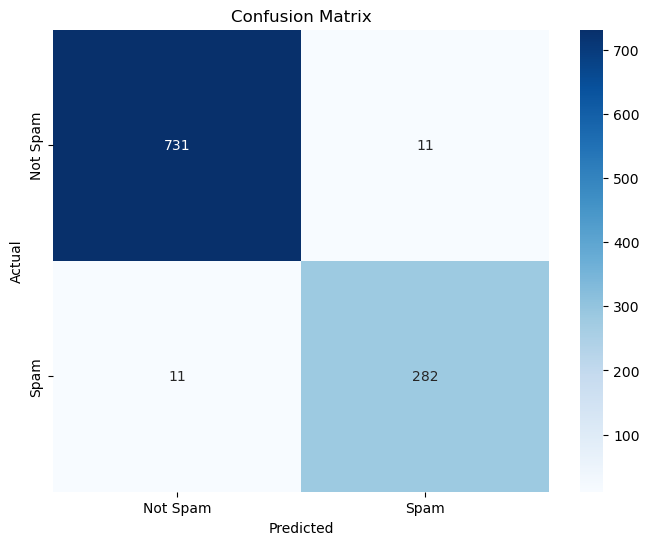

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are available from your previous code
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:

# Step 7: Evaluating Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 8: Displaying Results
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       742
        spam       0.96      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [34]:
# Step 9: Save the Model and Vectorizer
joblib.dump(nb_classifier, 'naive_bayes_model.pkl')
joblib.dump(vectorizer, 'count_vectorizer.pkl')

# Load the Model and Vectorizer
nb_classifier = joblib.load('naive_bayes_model.pkl')
vectorizer = joblib.load('count_vectorizer.pkl')


In [35]:
# Use the Model on a Message
def classify_message(message):
    message_vectorized = vectorizer.transform([message])
    prediction = nb_classifier.predict(message_vectorized)
    return prediction[0]



In [36]:
#Example Usage
new_message = "Congratulations! You've won a free gift card!"
result = classify_message(new_message)

if result == 'spam':
    print("This message is classified as spam.")
else:
    print("This message is not spam.")

This message is classified as spam.
